# [Go to "10 minutes to `pandas`"](https://pandas.pydata.org/docs/getting_started/10min.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Creation

## 1.1 Series

> Creating a `Series` from a list of values. `pandas` by default adds a `RangeIndex`:

In [2]:
s = pd.Series([1, 2, 3, 'a', 'b', 'c', '', np.nan], name='stuff')
s

0      1
1      2
2      3
3      a
4      b
5      c
6       
7    NaN
Name: stuff, dtype: object

> Creating a `Series` from a numpy `ndarray`:

In [3]:
an_array = np.array([2.55, -4.015, 8, np.nan, 128])
s = pd.Series(an_array, dtype='float32')
s

0      2.550
1     -4.015
2      8.000
3        NaN
4    128.000
dtype: float32

## 1.2 Dataframes

> Creating a `DataFrame` with a `DatetimeIndex` and column labels, from a `NumPy` array:

In [4]:
# creating the datetime index
dates = pd.date_range('2020-01-01', periods=7)

# creating the NumPy array
data_array = np.random.randn(7, 4)

# creating the DataFrame
df = pd.DataFrame(data_array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,-0.778405,0.364494,0.131310,-0.904821
2020-01-02,1.815767,-0.572712,2.231913,-0.095076
2020-01-03,-0.271966,1.277371,1.551866,-0.279791
2020-01-04,0.848152,-0.586431,1.566883,-1.843812
2020-01-05,-1.870882,-0.201893,-1.360019,0.176170
2020-01-06,1.506436,0.897795,0.339148,0.271926
2020-01-07,0.095030,0.677632,1.052800,0.651314


In [5]:
# a one-liner for the above
df = pd.DataFrame(np.random.randn(7, 4),
                   index=pd.date_range('2020-01-01', periods=7),
                   columns=list('ABCD')) 
df

,A,B,C,D
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-07,-0.335276,0.535435,1.158086,-0.274591


> Creating a `DataFrame` from a `dict` of objects that can be converted to series-like:

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('2020-01-02'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2020-01-02,1.0,3,test,foo
1,1.0,2020-01-02,1.0,3,train,foo
2,1.0,2020-01-02,1.0,3,test,foo
3,1.0,2020-01-02,1.0,3,train,foo


In [7]:
df2.dtypes  # checking data types 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing Data

### 2.1 Viewing the top of the dataframe

In [8]:
df.head()

,A,B,C,D
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069


In [9]:
df.head(n=10)  # default n=5

,A,B,C,D
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-07,-0.335276,0.535435,1.158086,-0.274591


### 2.2 Viewing the bottom of the dataframe

In [10]:
df.tail()

,A,B,C,D
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-07,-0.335276,0.535435,1.158086,-0.274591


### 2.3 Viewing the index and columns

In [11]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### 2.4 To get a quick statistical summary

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.441482,-0.291972,0.191521,-0.521032
std,1.267527,0.837761,0.908637,1.310145
min,-1.697304,-1.446413,-0.835136,-3.134069
25%,-1.250911,-0.962699,-0.520730,-0.699735
50%,-0.593318,0.043275,0.228470,-0.274591
75%,-0.203541,0.308992,0.719770,0.008170
max,2.109155,0.666752,1.549233,1.144568


In [14]:
# for non-numeric columns
df2.describe(include=['object', 'category']) 

,E,F
count,4,4
unique,2,1
top,train,foo
freq,2,4


### 2.5 Transposing data

In [15]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07
A,-0.593318,-1.445289,-1.697304,-1.056533,2.109155,-0.071806,-0.335276
B,-1.446413,-0.715554,-1.209844,0.666752,0.082548,0.043275,0.535435
C,-0.835136,1.549233,-0.299355,0.281454,0.228470,-0.742106,1.158086
D,1.144568,-0.622465,-0.777006,0.003661,-3.134069,0.012678,-0.274591


### 2.6 Sorting by axis

In [16]:
# sorting the columns (by label) in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,1.144568,-0.835136,-1.446413,-0.593318
2020-01-02,-0.622465,1.549233,-0.715554,-1.445289
2020-01-03,-0.777006,-0.299355,-1.209844,-1.697304
2020-01-04,0.003661,0.281454,0.666752,-1.056533
2020-01-05,-3.134069,0.228470,0.082548,2.109155
2020-01-06,0.012678,-0.742106,0.043275,-0.071806
2020-01-07,-0.274591,1.158086,0.535435,-0.335276


In [17]:
# sorting the rows (by index) in descending order
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2020-01-07,-0.335276,0.535435,1.158086,-0.274591
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568


### 2.7 Sorting by values

In [18]:
# sorting rows in ascending order by values in colums B
df.sort_values(by='B')  # the default order is ascending=True

,A,B,C,D
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-07,-0.335276,0.535435,1.158086,-0.274591
2020-01-04,-1.056533,0.666752,0.281454,0.003661


In [19]:
# sorting rows in descending order by values in colums C
df.sort_values(by='C', ascending=False)

,A,B,C,D
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-07,-0.335276,0.535435,1.158086,-0.274591
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568


# 3. Selection

### 3.1 Selecting a single column, which yields a `Series`

In [20]:
df.A

2020-01-01   -0.593318
2020-01-02   -1.445289
2020-01-03   -1.697304
2020-01-04   -1.056533
2020-01-05    2.109155
2020-01-06   -0.071806
2020-01-07   -0.335276
Freq: D, Name: A, dtype: float64

In [21]:
df['A']

2020-01-01   -0.593318
2020-01-02   -1.445289
2020-01-03   -1.697304
2020-01-04   -1.056533
2020-01-05    2.109155
2020-01-06   -0.071806
2020-01-07   -0.335276
Freq: D, Name: A, dtype: float64

### 3.2 Selecting slices of rows

In [22]:
df['2020-01-02':'2020-01-04']

,A,B,C,D
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006
2020-01-04,-1.056533,0.666752,0.281454,0.003661


### 3.3 Selection by label

In [23]:
# selecting the first row
df.loc['2020-01-01']

A   -0.593318
B   -1.446413
C   -0.835136
D    1.144568
Name: 2020-01-01 00:00:00, dtype: float64

In [24]:
# selecting values from columns 'A' and 'C'
df.loc[:, ['A', 'C']]

,A,C
2020-01-01,-0.593318,-0.835136
2020-01-02,-1.445289,1.549233
2020-01-03,-1.697304,-0.299355
2020-01-04,-1.056533,0.281454
2020-01-05,2.109155,0.228470
2020-01-06,-0.071806,-0.742106
2020-01-07,-0.335276,1.158086


In [25]:
# multi-axis label selection
df.loc['2020-01-02':'2020-01-05', ['B', 'D']]

,B,D
2020-01-02,-0.715554,-0.622465
2020-01-03,-1.209844,-0.777006
2020-01-04,0.666752,0.003661
2020-01-05,0.082548,-3.134069


### 3.4 Reduction in dimension of the returned object

In [26]:
df.loc['2020-01-02', ['A', 'B']]

A   -1.445289
B   -0.715554
Name: 2020-01-02 00:00:00, dtype: float64

### 3.5 Getting fast access to a scalar value

In [27]:
 df.at['2020-01-04', 'A'] # label based

-1.0565328114397097

In [28]:
df.iat[3, 0] # position based

-1.0565328114397097

### 3.6 Selection by position

In [29]:
df.iloc[4]

A    2.109155
B    0.082548
C    0.228470
D   -3.134069
Name: 2020-01-05 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 2:4]

,C,D
2020-01-04,0.281454,0.003661
2020-01-05,0.228470,-3.134069


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-01-02,-1.445289,1.549233
2020-01-03,-1.697304,-0.299355
2020-01-05,2.109155,0.228470


### 3.7 Boolean indexing

In [32]:
# selecting rows for which values in column 'B' are greater than zero
df[df['B'] > 0]

,A,B,C,D
2020-01-04,-1.056533,0.666752,0.281454,0.003661
2020-01-05,2.109155,0.082548,0.228470,-3.134069
2020-01-06,-0.071806,0.043275,-0.742106,0.012678
2020-01-07,-0.335276,0.535435,1.158086,-0.274591


### 3.8 Using the `isin()` method for filtering

In [33]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three','seven']
df2

,A,B,C,D,E
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568,one
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465,one
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006,two
2020-01-04,-1.056533,0.666752,0.281454,0.003661,three
2020-01-05,2.109155,0.082548,0.228470,-3.134069,four
2020-01-06,-0.071806,0.043275,-0.742106,0.012678,three
2020-01-07,-0.335276,0.535435,1.158086,-0.274591,seven


In [34]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006,two
2020-01-05,2.109155,0.082548,0.228470,-3.134069,four


# 4. Setting

In [35]:
s1 = pd.Series(range(1, 8), index=pd.date_range('2020-01-02', periods=7))

# setting s1 as column 'F' in the dataframe
df['F'] = s1
df

,A,B,C,D,F
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568,NaN
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465,1.0
2020-01-03,-1.697304,-1.209844,-0.299355,-0.777006,2.0
2020-01-04,-1.056533,0.666752,0.281454,0.003661,3.0
2020-01-05,2.109155,0.082548,0.228470,-3.134069,4.0
2020-01-06,-0.071806,0.043275,-0.742106,0.012678,5.0
2020-01-07,-0.335276,0.535435,1.158086,-0.274591,6.0


### 4.1 Setting values by label

In [36]:
df.at['2020-01-03', 'C'] = 0
df

,A,B,C,D,F
2020-01-01,-0.593318,-1.446413,-0.835136,1.144568,NaN
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465,1.0
2020-01-03,-1.697304,-1.209844,0.000000,-0.777006,2.0
2020-01-04,-1.056533,0.666752,0.281454,0.003661,3.0
2020-01-05,2.109155,0.082548,0.228470,-3.134069,4.0
2020-01-06,-0.071806,0.043275,-0.742106,0.012678,5.0
2020-01-07,-0.335276,0.535435,1.158086,-0.274591,6.0


### 4.2 Setting values by position

In [37]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-01-01,-0.593318,0.000000,-0.835136,1.144568,NaN
2020-01-02,-1.445289,-0.715554,1.549233,-0.622465,1.0
2020-01-03,-1.697304,-1.209844,0.000000,-0.777006,2.0
2020-01-04,-1.056533,0.666752,0.281454,0.003661,3.0
2020-01-05,2.109155,0.082548,0.228470,-3.134069,4.0
2020-01-06,-0.071806,0.043275,-0.742106,0.012678,5.0
2020-01-07,-0.335276,0.535435,1.158086,-0.274591,6.0


### 4.3 Setting by assigning with a NumPy array

In [38]:
df.loc[:, 'D'] = np.array([7] * len(df))
df

,A,B,C,D,F
2020-01-01,-0.593318,0.000000,-0.835136,7,NaN
2020-01-02,-1.445289,-0.715554,1.549233,7,1.0
2020-01-03,-1.697304,-1.209844,0.000000,7,2.0
2020-01-04,-1.056533,0.666752,0.281454,7,3.0
2020-01-05,2.109155,0.082548,0.228470,7,4.0
2020-01-06,-0.071806,0.043275,-0.742106,7,5.0
2020-01-07,-0.335276,0.535435,1.158086,7,6.0


### 4.4 A `where` operation with setting

In [39]:
df2 = df.copy()
df2[df2 < 0] = "-ve"
df2

,A,B,C,D,F
2020-01-01,-ve,0,-ve,7,NaN
2020-01-02,-ve,-ve,1.54923,7,1.0
2020-01-03,-ve,-ve,0,7,2.0
2020-01-04,-ve,0.666752,0.281454,7,3.0
2020-01-05,2.10915,0.0825481,0.22847,7,4.0
2020-01-06,-ve,0.0432746,-ve,7,5.0
2020-01-07,-ve,0.535435,1.15809,7,6.0


# 5. Missing Data

In [40]:
# Adding some NaN values (the default representation for missing data)
df.iloc[4, 2:4] = np.nan
df.at['2020-01-05','A'] = np.nan
df

,A,B,C,D,F
2020-01-01,-0.593318,0.000000,-0.835136,7.0,NaN
2020-01-02,-1.445289,-0.715554,1.549233,7.0,1.0
2020-01-03,-1.697304,-1.209844,0.000000,7.0,2.0
2020-01-04,-1.056533,0.666752,0.281454,7.0,3.0
2020-01-05,NaN,0.082548,NaN,NaN,4.0
2020-01-06,-0.071806,0.043275,-0.742106,7.0,5.0
2020-01-07,-0.335276,0.535435,1.158086,7.0,6.0


### 5.1 Dropping rows with missing data

In [41]:
df.dropna()  # returns a copy with rows having NaN values eliminated
# df.dropna(inplace=True)   # modifies df

,A,B,C,D,F
2020-01-02,-1.445289,-0.715554,1.549233,7.0,1.0
2020-01-03,-1.697304,-1.209844,0.000000,7.0,2.0
2020-01-04,-1.056533,0.666752,0.281454,7.0,3.0
2020-01-06,-0.071806,0.043275,-0.742106,7.0,5.0
2020-01-07,-0.335276,0.535435,1.158086,7.0,6.0


### 5.2 Filling missing values

In [42]:
df.fillna(value=0.11111) # returns a copy with NaN values substituted with 0.11111

,A,B,C,D,F
2020-01-01,-0.593318,0.000000,-0.835136,7.00000,0.11111
2020-01-02,-1.445289,-0.715554,1.549233,7.00000,1.00000
2020-01-03,-1.697304,-1.209844,0.000000,7.00000,2.00000
2020-01-04,-1.056533,0.666752,0.281454,7.00000,3.00000
2020-01-05,0.111110,0.082548,0.111110,0.11111,4.00000
2020-01-06,-0.071806,0.043275,-0.742106,7.00000,5.00000
2020-01-07,-0.335276,0.535435,1.158086,7.00000,6.00000


### 5.3 To get the boolean mask where values are `nan`:

In [43]:
pd.isna(df)

,A,B,C,D,F
2020-01-01,False,False,False,False,True
2020-01-02,False,False,False,False,False
2020-01-03,False,False,False,False,False
2020-01-04,False,False,False,False,False
2020-01-05,True,False,True,True,False
2020-01-06,False,False,False,False,False
2020-01-07,False,False,False,False,False


# 6. Operations

In [44]:
df.mean() # gives the mean for each column

A   -0.866588
B   -0.085341
C    0.235255
D    7.000000
F    3.500000
dtype: float64

In [45]:
df.mean(axis=1) # calculates the mean for each row 

2020-01-01    1.392886
2020-01-02    1.477678
2020-01-03    1.218570
2020-01-04    1.978335
2020-01-05    2.041274
2020-01-06    2.245873
2020-01-07    2.871649
Freq: D, dtype: float64

### 6.1 Applying functions to the dataframe

In [46]:
df.fillna(0).apply(np.ptp)  # quickly getting the range per column

A    1.697304
B    1.876597
C    2.384370
D    7.000000
F    6.000000
dtype: float64

In [47]:
df.apply(lambda x: x**3 + 1 )

,A,B,C,D,F
2020-01-01,0.791136,1.000000,0.417532,344.0,NaN
2020-01-02,-2.019009,0.633624,4.718353,344.0,2.0
2020-01-03,-3.889665,-0.770878,1.000000,344.0,9.0
2020-01-04,-0.179367,1.296410,1.022296,344.0,28.0
2020-01-05,NaN,1.000562,NaN,NaN,65.0
2020-01-06,0.999630,1.000081,0.591306,344.0,126.0
2020-01-07,0.962311,1.153505,2.553182,344.0,217.0


### 6.2 Histogramming

In [48]:
s = pd.Series(list('abcdababddknkz'))
s.value_counts()

d    3
b    3
a    3
k    2
n    1
c    1
z    1
dtype: int64

### 6.3 String methods

In [49]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [50]:
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

# 7. Merge

### 7.1 Concat

In [51]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['1st','2nd','3rd','4th'])
df

,1st,2nd,3rd,4th
0,-1.230204,-0.255669,-0.650784,0.461320
1,0.107160,0.476626,-1.255596,0.431344
2,-0.286662,-0.573497,0.188296,0.828678
3,0.527316,-0.599888,0.438865,-0.556551
4,0.009449,-0.276807,-1.354778,-2.131444
5,2.791200,-0.487447,-0.733116,1.729474
6,-1.353898,-1.692424,0.752570,0.024657
7,-0.518427,-2.681947,2.272426,1.147685


In [52]:
# getting 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]

print(df1,df2,df3, sep='\n\n')

        1st       2nd       3rd       4th
0 -1.230204 -0.255669 -0.650784  0.461320
1  0.107160  0.476626 -1.255596  0.431344
2 -0.286662 -0.573497  0.188296  0.828678

        1st       2nd       3rd       4th
3  0.527316 -0.599888  0.438865 -0.556551
4  0.009449 -0.276807 -1.354778 -2.131444
5  2.791200 -0.487447 -0.733116  1.729474
6 -1.353898 -1.692424  0.752570  0.024657

        1st       2nd       3rd       4th
7 -0.518427 -2.681947  2.272426  1.147685


In [53]:
# concatinating the 3 chunks 
df4 = pd.concat([df3, df2, df1])
df4

,1st,2nd,3rd,4th
7,-0.518427,-2.681947,2.272426,1.147685
3,0.527316,-0.599888,0.438865,-0.556551
4,0.009449,-0.276807,-1.354778,-2.131444
5,2.791200,-0.487447,-0.733116,1.729474
6,-1.353898,-1.692424,0.752570,0.024657
0,-1.230204,-0.255669,-0.650784,0.461320
1,0.107160,0.476626,-1.255596,0.431344
2,-0.286662,-0.573497,0.188296,0.828678


### 7.2 Join
SQL - style merges

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,foo,2
2,bar,3


In [55]:
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,foo,4
1,bar,5
2,foo,6


In [56]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,2,4
3,foo,2,6
4,bar,3,5


# 8. Grouping

In this context, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two'],
                   'C': np.random.randn(6),
                   'D': np.random.randn(6)})
df

,A,B,C,D
0,foo,one,0.819217,0.728617
1,bar,one,0.805259,0.210746
2,foo,two,0.409106,-0.028681
3,bar,three,-0.764830,1.513379
4,foo,two,-1.242648,0.022385
5,bar,two,0.310744,0.017784


In [58]:
 df.groupby('B').sum()

,C,D
B,,
one,1.624476,0.939363
three,-0.764830,1.513379
two,-0.522797,0.011488


In [59]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.805259  0.210746
    three -0.764830  1.513379
    two    0.310744  0.017784
foo one    0.819217  0.728617
    two   -0.833542 -0.006296

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
    
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.608881  0.643897
      two     0.485037  0.091003
baz   one     0.471747 -0.136383
      two     0.493333 -1.482269
foo   one    -0.346354 -1.496210
      two    -1.993569  0.022365
qux   one     2.295232  0.563681
      two    -1.355446  0.073221

In [61]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.608881
               B    0.643897
       two     A    0.485037
               B    0.091003
baz    one     A    0.471747
               B   -0.136383
       two     A    0.493333
               B   -1.482269
foo    one     A   -0.346354
               B   -1.496210
       two     A   -1.993569
               B    0.022365
qux    one     A    2.295232
               B    0.563681
       two     A   -1.355446
               B    0.073221
dtype: float64

>With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is **`unstack()`**, which by default unstacks the last level:

In [62]:
stacked.unstack(level=0)  # unstacking the 1st level of the MultiIndex

first          bar       baz       foo       qux
second                                          
one    A  0.608881  0.471747 -0.346354  2.295232
       B  0.643897 -0.136383 -1.496210  0.563681
two    A  0.485037  0.493333 -1.993569 -1.355446
       B  0.091003 -1.482269  0.022365  0.073221

In [63]:
stacked.unstack(level=1)  # unstacking the 2nd level of the MultiIndex

second        one       two
first                      
bar   A  0.608881  0.485037
      B  0.643897  0.091003
baz   A  0.471747  0.493333
      B -0.136383 -1.482269
foo   A -0.346354 -1.993569
      B -1.496210  0.022365
qux   A  2.295232 -1.355446
      B  0.563681  0.073221

In [64]:
stacked.unstack(1).unstack(0)

second       one                                     two                      \
first        bar       baz       foo       qux       bar       baz       foo   
A       0.608881  0.471747 -0.346354  2.295232  0.485037  0.493333 -1.993569   
B       0.643897 -0.136383 -1.496210  0.563681  0.091003 -1.482269  0.022365   

second            
first        qux  
A      -1.355446  
B       0.073221

### 9.2 Pivot tables

In [65]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.078900,-0.248657
1,one,B,foo,-1.599463,-0.570928
2,two,C,foo,1.374542,-1.363516
3,three,A,bar,0.214547,-0.393209
4,one,B,bar,-0.090187,1.129796
5,one,C,bar,0.673180,-0.628380
6,two,A,foo,-1.237536,-0.576819
7,three,B,foo,-0.738749,1.734379
8,one,C,foo,1.375853,1.467062
9,one,A,bar,-0.315594,-1.001331


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.315594  0.078900
      B -0.090187 -1.599463
      C  0.673180  1.375853
three A  0.214547       NaN
      B       NaN -0.738749
      C  0.052844       NaN
two   A       NaN -1.237536
      B  0.160185       NaN
      C       NaN  1.374542

# 10. Time Series

`pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into minutely data)

In [67]:
rng = pd.date_range('1/1/2020', periods=24, freq='M')
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [68]:
ts = pd.Series(np.random.randint(0, 24, len(rng)), index=rng, name='monthly-foo')
ts.head()

2020-01-31    15
2020-02-29    13
2020-03-31    10
2020-04-30     3
2020-05-31    20
Freq: M, Name: monthly-foo, dtype: int64

In [69]:
ts.resample('3M').sum()  # gets totals for every quarter( 3 months)

2020-01-31    15
2020-04-30    26
2020-07-31    40
2020-10-31    33
2021-01-31    25
2021-04-30    19
2021-07-31    60
2021-10-31    52
2022-01-31    13
Freq: 3M, Name: monthly-foo, dtype: int64

### 10.1 Time zone representation

In [70]:
ts_utc = ts.tz_localize('CET')
ts_utc.head()

2020-01-31 00:00:00+01:00    15
2020-02-29 00:00:00+01:00    13
2020-03-31 00:00:00+02:00    10
2020-04-30 00:00:00+02:00     3
2020-05-31 00:00:00+02:00    20
Name: monthly-foo, dtype: int64

### 10.2 Converting to another time zone:

In [71]:
ts_utc.tz_convert('US/Eastern').head()

2020-01-30 18:00:00-05:00    15
2020-02-28 18:00:00-05:00    13
2020-03-30 18:00:00-04:00    10
2020-04-29 18:00:00-04:00     3
2020-05-30 18:00:00-04:00    20
Name: monthly-foo, dtype: int64

### 10.3 Converting between time span representations:

In [72]:
ps = ts.to_period()
ps.head()

2020-01    15
2020-02    13
2020-03    10
2020-04     3
2020-05    20
Freq: M, Name: monthly-foo, dtype: int64

In [73]:
ps.index

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'],
            dtype='period[M]', freq='M')

In [74]:
ps.to_timestamp().index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')

# 11. Categoricals

In [75]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [76]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [77]:
# Rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 12. Plotting

<AxesSubplot:>

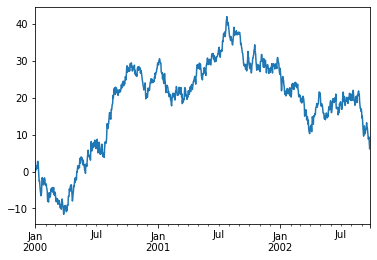

In [78]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

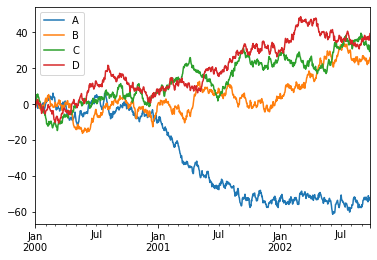

In [79]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

df.plot()

# 13. Importing / Exporting Data

### CSV

In [80]:
# Writing to a csv file
df.to_csv('data.csv')

In [81]:
# Reading from a csv file
pd.read_csv('data.csv', index_col=0).head()

,A,B,C,D
2000-01-01,-0.588048,-0.466563,-0.726060,-0.444380
2000-01-02,0.307710,-1.011464,-0.274573,-1.872180
2000-01-03,-0.586608,-0.096899,-0.499371,-0.597476
2000-01-04,0.063752,-0.613014,1.497980,1.028234
2000-01-05,-0.595799,0.321083,3.115831,1.431177


### Excel

In [82]:
# Writing to an excel file
df.to_excel('data.xlsx', sheet_name='Sheet1')

In [83]:
# Reading from an excel file
pd.read_excel('data.xlsx', index_col=0).head()

,A,B,C,D
2000-01-01,-0.588048,-0.466563,-0.726060,-0.444380
2000-01-02,0.307710,-1.011464,-0.274573,-1.872180
2000-01-03,-0.586608,-0.096899,-0.499371,-0.597476
2000-01-04,0.063752,-0.613014,1.497980,1.028234
2000-01-05,-0.595799,0.321083,3.115831,1.431177


### HDF5

In [84]:
# Writing to a HDF5 Store
df.to_hdf('data.hdf', 'df')

In [85]:
# Reading from a HDF5 Store 
pd.read_hdf('data.hdf', 'df').head()

,A,B,C,D
2000-01-01,-0.588048,-0.466563,-0.726060,-0.444380
2000-01-02,0.307710,-1.011464,-0.274573,-1.872180
2000-01-03,-0.586608,-0.096899,-0.499371,-0.597476
2000-01-04,0.063752,-0.613014,1.497980,1.028234
2000-01-05,-0.595799,0.321083,3.115831,1.431177
